In [1]:
import pandas as pd
import numpy as np

import re

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report,accuracy_score
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
df=pd.read_excel('Train_Dataset.xlsx')

# 데이터 탐색

In [69]:
print(df.shape)
df.tail(5)


(114912, 16)


,loan_status,loan amount,interest rate,LC_grade,length of employment,housing situation,annual income,loan purpose,debt to income ratio,public records,delinquency in past 2 years,number of finance trades,bankcard open to buy,mortgage accounts,number of bankcard accounts,id
114907,False,25000,0.1709,D,10,RENT,120000.0,small_business,13.15,0,0,1,74790,0,6,143633
114908,False,7000,0.2145,D,5,OWN,90000.0,medical,17.36,0,0,1,2416,3,6,143634
114909,False,10450,0.2145,D,7,MORTGAGE,64000.0,major_purchase,24.62,0,0,13,28475,2,11,143636
114910,False,17750,0.1903,D,10,MORTGAGE,50000.0,debt_consolidation,18.72,0,0,1,4625,1,8,143637
114911,False,35000,0.3089,G,4,RENT,75000.0,debt_consolidation,25.44,0,0,0,13771,0,6,143640


In [75]:
df.set_index("id", inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114912 entries, 0 to 114911
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_status                  114912 non-null  bool   
 1   loan amount                  114912 non-null  int64  
 2   interest rate                114912 non-null  float64
 3   LC_grade                     114912 non-null  object 
 4   length of employment         114912 non-null  int64  
 5   housing situation            114912 non-null  object 
 6   annual income                114912 non-null  float64
 7   loan purpose                 114912 non-null  object 
 8   debt to income ratio         114912 non-null  float64
 9   public records               114912 non-null  int64  
 10  delinquency in past 2 years  114912 non-null  int64  
 11  number of finance trades     114912 non-null  int64  
 12  bankcard open to buy         114912 non-null  int64  
 13 

In [11]:
df.describe()

,loan amount,interest rate,length of employment,annual income,debt to income ratio,public records,delinquency in past 2 years,number of finance trades,bankcard open to buy,mortgage accounts,number of bankcard accounts,id
count,114912.000000,114912.000000,114912.000000,1.149120e+05,114912.000000,114912.000000,114912.000000,114912.000000,114912.000000,114912.000000,114912.000000,114912.000000
mean,14794.935907,0.138554,6.056904,8.191096e+04,18.445444,0.256457,0.006562,1.757719,11536.807322,1.663003,7.879691,71820.606899
std,9171.555917,0.053696,3.719420,8.260210e+04,9.568101,0.645798,0.085654,2.978274,16342.428708,1.912563,4.803094,41459.839938
min,1000.000000,0.053200,0.000000,6.000000e+02,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7600.000000,0.098000,3.000000,5.000000e+04,11.900000,0.000000,0.000000,0.000000,2038.000000,0.000000,4.000000,35883.750000
50%,12500.000000,0.129900,6.000000,7.000000e+04,17.820000,0.000000,0.000000,1.000000,5971.000000,1.000000,7.000000,71772.500000
75%,20000.000000,0.169900,10.000000,9.700000e+04,24.470000,0.000000,0.000000,2.000000,14258.250000,3.000000,10.000000,107714.250000
max,40000.000000,0.309900,10.000000,9.550000e+06,999.000000,46.000000,4.000000,68.000000,320558.000000,51.000000,68.000000,143640.000000


In [12]:
df.isnull().sum()  

loan_status                    0
loan amount                    0
interest rate                  0
LC_grade                       0
length of employment           0
housing situation              0
annual income                  0
loan purpose                   0
debt to income ratio           0
public records                 0
delinquency in past 2 years    0
number of finance trades       0
bankcard open to buy           0
mortgage accounts              0
number of bankcard accounts    0
id                             0
dtype: int64

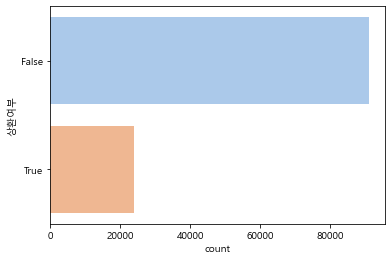

In [70]:
sns.set_palette("pastel")
sns.countplot(y='loan_status',data=df)
plt.ylabel('상환여부')
plt.show()

Text(0.5, 0, '일한기간')

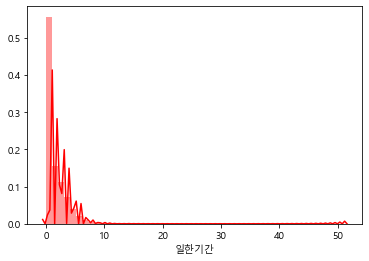

In [40]:
sns.distplot(df['mortgage accounts'],color='red')
plt.xlabel('일한기간')

Text(0.5, 0, '일한기간')

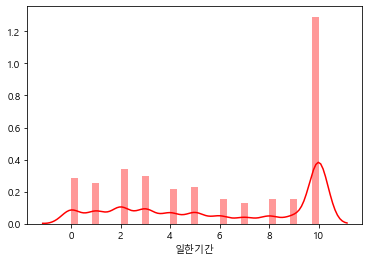

In [27]:
# 10년이상 일한사람이 많은 것을 보아 주요 대출고객은 30세 이상으로 추정
sns.distplot(df['length of employment'],color='red')
plt.xlabel('일한기간')

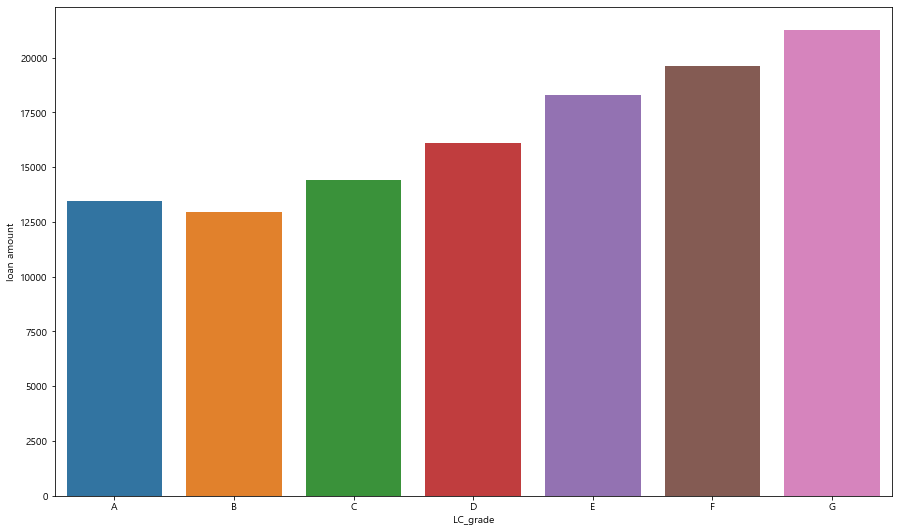

In [82]:
# 신용등급별로 값의 평균을 내고 대출금액을 비교하니 등급이 낮을수록 대출액이 많음
group = df_.groupby("LC_grade").mean()
avg_loan = group['loan amount'].reset_index()
plt.subplots(figsize=(15,9))
sns.barplot(x='LC_grade', y='loan amount', data=avg_loan)

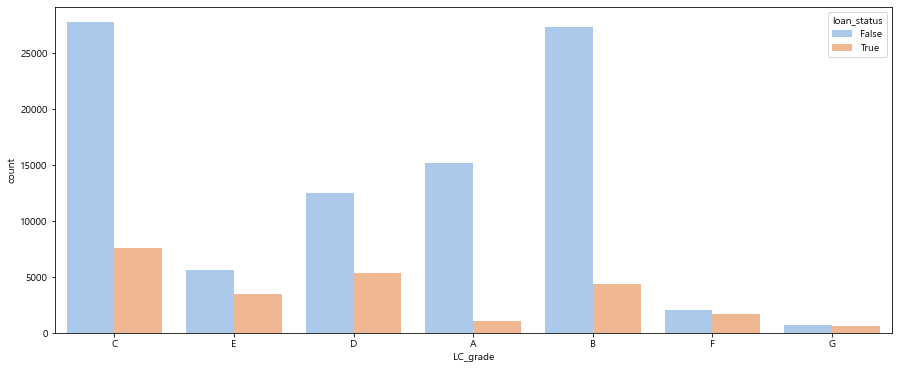

In [37]:
#등급이 높은 사람이 대출을 많이 했으며 높을수록 미상환 비율이 높음
fig = plt.figure(figsize=(15,6))
sns.countplot(x="LC_grade", data=df, hue='loan_status')

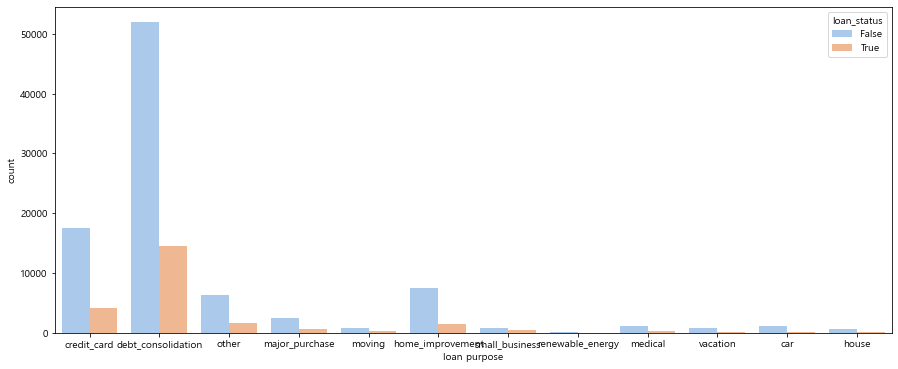

In [29]:
# 대출목적중에 다른 대출금을 갚기 위했을때 상환하지 못함
sns.set_palette("pastel")
fig = plt.figure(figsize=(15,6))
sns.countplot(x="loan purpose", data=df, hue='loan_status')

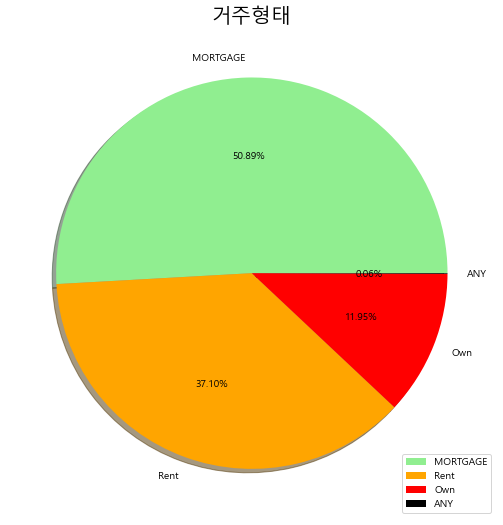

In [45]:
labels = ['MORTGAGE', 'Rent','Own','ANY']  # 파이차트 분류에 나타낼 이름
size = df['housing situation'].value_counts()   # 해당변수 값들 카운트
colors = ['lightgreen', 'orange','red','black']      # 분류별 색깔
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')  
# size에 대해 파이차트 그림 , color은 안주면 자동으로 색 분류, explode는 파이차트는 분류된것으로 차트분리, Shadow는 입체형 , autopct는 소수점
plt.title('거주형태', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

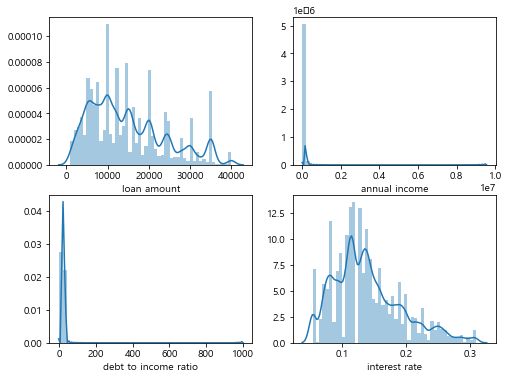

In [85]:
fig, axes = plt.subplots(nrows=2,ncols=2)   #박스플롯을 2행 2열로봄
fig.set_size_inches(8, 6)
sns.distplot(df['loan amount'],ax=axes[0][0])
sns.distplot(df['annual income'],ax=axes[0][1])
sns.distplot(df['debt to income ratio'],ax=axes[1][0])
sns.distplot(df['interest rate'],ax=axes[1][1])

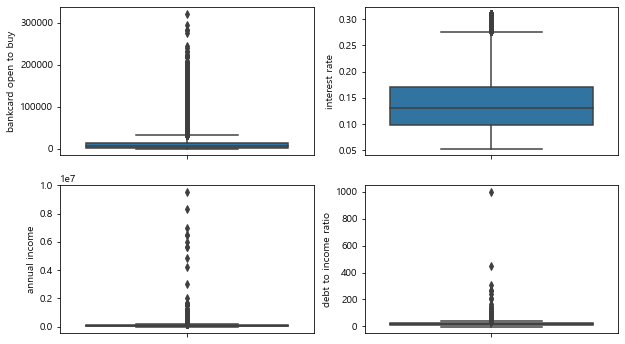

In [58]:
# 소득대비 채무에 이상값이 있어 제거필요
fig, axes = plt.subplots(nrows=2,ncols=2)   #박스플롯을 2행 2열로봄
fig.set_size_inches(10, 6)
sns.boxplot(data=df,y="bankcard open to buy",ax=axes[0][0])
sns.boxplot(data=df,y="interest rate",ax=axes[0][1])
sns.boxplot(data=df,y="annual income",ax=axes[1][0])
sns.boxplot(data=df,y="debt to income ratio",ax=axes[1][1])

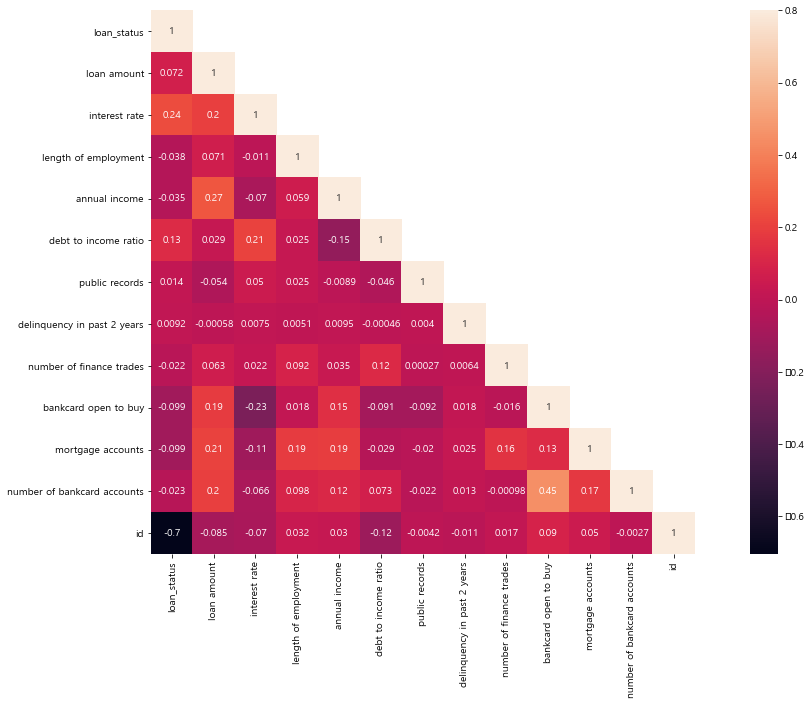

In [66]:
corr=pd.DataFrame.corr(df)
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

# 전처리

In [4]:
# 추정소득 계산
df['총소득']=df['annual income']* df['length of employment']
for a in range(0,114911):
    if(df['annual income'][a] < 17150):
        df['추정 소득']=df['총소득']-(df['총소득']*0.04)
    elif(17150 <=df['annual income'][a] < 23600):
        df['추정 소득']=df['총소득']-(df['총소득']*0.045)
    elif(23600 <=df['annual income'][a] < 27900):
        df['추정 소득']=df['총소득']-(df['총소득']*0.0525)       
    elif(27900 <=df['annual income'][a] < 43000):
        df['추정 소득']=df['총소득']-(df['총소득']*0.0633)  
    elif(43000 <=df['annual income'][a] < 161550):
        df['추정 소득']=df['총소득']-(df['총소득']*0.0657)  
    elif(161550 <=df['annual income'][a] < 323220):
        df['추정 소득']=df['총소득']-(df['총소득']*0.0685)  
    else:
        df['추정 소득']=df['총소득']-(df['총소득']*0.082)  

In [5]:
# 대출총액
df['대출총액']= df['loan amount']+(10000*df['interest rate'])

In [6]:
#모기지거래
for a in range(0,114911):
    if(df['mortgage accounts'][a]>=4):
        df['모기지거래']="많음"
    else: df['모기지거래']="적음"

In [7]:
#이상치 제거
df= df[df['debt to income ratio']<=40]
df= df[df['bankcard open to buy']<=200000]
df=df[df['loan amount']<=6000000]

In [8]:
#로그화
df['loan amount']=preprocessing.scale(np.log(df['loan amount']+1))
df['annual income']=preprocessing.scale(np.log(df['annual income']+1))
df['debt to income ratio']=preprocessing.scale(np.sqrt(df['debt to income ratio']+1))

In [9]:
# 주거형태에서 ANY 제거후 최빈값인 MORTGAGE
df['housing situation']=df['housing situation'].replace('ANY','MORTGAGE')

In [10]:
#범주변수 재분류
df['loan purpose']=df['loan purpose'].replace('car','private')
df['loan purpose']=df['loan purpose'].replace('vacation','private')
df['loan purpose']=df['loan purpose'].replace('house','private')

df['loan purpose']=df['loan purpose'].replace('debt_consolidation','debt repayment')
df['loan purpose']=df['loan purpose'].replace('credit_card','debt repayment')

df['loan purpose']=df['loan purpose'].replace('small_business','financial technology')
df['loan purpose']=df['loan purpose'].replace('renewable_energy','financial technology')

df['loan purpose']=df['loan purpose'].replace('major_purchase','compulsory expend')
df['loan purpose']=df['loan purpose'].replace('moving','compulsory expend')
df['loan purpose']=df['loan purpose'].replace('home_improvement','compulsory expend')
df['loan purpose']=df['loan purpose'].replace('medical','compulsory expend')

In [11]:
#모든 수치변수를 정규화  /  범주변수를 더미화하기전에 실행
num_cols = df.columns[df.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler=StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [12]:
# 더미변수
df = pd.get_dummies(df, columns=['housing situation'])
df = pd.get_dummies(df, columns=['loan purpose'])
df = pd.get_dummies(df, columns=['LC_grade'])
df = pd.get_dummies(df, columns=['모기지거래'])

# 모델링

In [13]:
df.drop(columns=['id','총소득','mortgage accounts' , 'loan amount'], inplace=True)

In [14]:
# x, y 나누기
X=df.drop('loan_status',axis=1)
Y=df['loan_status']
X_train,X_test,y_train,y_test= train_test_split(X,Y, test_size=0.3)

In [15]:
# 오버샘플링: 채무불이행이 많아 채무이행을 늘림
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_sample(X_train, y_train.ravel())

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 16400
Before OverSampling, counts of label '0': 63400 

After OverSampling, counts of label '1': 63400
After OverSampling, counts of label '0': 63400


In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(X_train_res, y_train_res)

In [ ]:
SVC_predictions=model.predict(X_test)

In [20]:
LR=LogisticRegression()
LR.fit(X_train_res,y_train_res)
LR_predictions=LR.predict(X_test)

In [21]:
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

       False       0.87      0.63      0.73     27123
        True       0.32      0.65      0.43      7078

    accuracy                           0.64     34201
   macro avg       0.60      0.64      0.58     34201
weighted avg       0.76      0.64      0.67     34201



In [22]:
#제일 잘나온 모델을 이용
Dicsion_Tree=DecisionTreeClassifier()
Dicsion_Tree.fit(X_train_res,y_train_res)

DecisionTreeClassifier()

In [23]:
predictions=Dicsion_Tree.predict(X_test)

In [24]:
print(confusion_matrix(y_test, predictions))

[[21911  5212]
 [ 5000  2078]]


In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.81      0.81      0.81     27123
        True       0.29      0.29      0.29      7078

    accuracy                           0.70     34201
   macro avg       0.55      0.55      0.55     34201
weighted avg       0.70      0.70      0.70     34201



In [16]:
RF=RandomForestClassifier()
RF.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [17]:
RF_prediction= RF.predict(X_test)

In [18]:
print(confusion_matrix(y_test, RF_prediction))

[[25305  1674]
 [ 5756  1466]]


In [19]:
print(classification_report(y_test, RF_prediction))

              precision    recall  f1-score   support

       False       0.81      0.94      0.87     26979
        True       0.47      0.20      0.28      7222

    accuracy                           0.78     34201
   macro avg       0.64      0.57      0.58     34201
weighted avg       0.74      0.78      0.75     34201



In [38]:
from sklearn.inspection import permutation_importance

In [41]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(RF, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

print(eli5.format_as_text(eli5.explain_weights(perm, feature_names = X_test.columns.tolist())))

Explained as: feature importances

Feature importances, computed as a decrease in score when feature
values are permuted (i.e. become noise). This is also known as 
permutation importance.

If feature importances are computed on the same data as used for training, 
they don't reflect importance of features for generalization. Use a held-out
dataset if you want generalization feature importances.

0.0022 ± 0.0014  debt to income ratio
0.0005 ± 0.0015  bankcard open to buy
0.0003 ± 0.0003  LC_grade_F
0.0002 ± 0.0007  LC_grade_D
0.0001 ± 0.0006  LC_grade_E
0.0001 ± 0.0024  대출총액
0.0001 ± 0.0001  LC_grade_G
0.0001 ± 0.0001  loan purpose_private
     0 ± 0.0000  모기지거래_적음
-0.0000 ± 0.0006  public records
-0.0001 ± 0.0001  delinquency in past 2 years
-0.0001 ± 0.0003  loan purpose_financial technology
-0.0002 ± 0.0005  loan purpose_compulsory expend
-0.0003 ± 0.0002  loan purpose_other
-0.0006 ± 0.0007  LC_grade_C
-0.0006 ± 0.0008  number of bankcard accounts
-0.0007 ± 0.0002  housing situatio

In [20]:
# k-fold 교차검정
kfold = KFold(n_splits=5, shuffle=True, random_state=7) 
results = cross_val_score(RF, X_train, y_train, cv=kfold)
print(results)

[0.80263158 0.7943609  0.79630326 0.79392231 0.79442356]


# 결과물제출

In [21]:
submit=pd.read_excel('Submit_Dataset.xlsx')
submit.head()

,loan_status,loan amount,interest rate,LC_grade,length of employment,housing situation,annual income,loan purpose,debt to income ratio,public records,delinquency in past 2 years,number of finance trades,bankcard open to buy,mortgage accounts,number of bankcard accounts,id
0,NaN,20000,0.0916,B,10,MORTGAGE,65000.0,debt_consolidation,28.88,0,0,6,4549,6,10,3
1,NaN,34000,0.0975,B,10,MORTGAGE,237000.0,debt_consolidation,22.53,1,0,0,13739,4,14,5
2,NaN,12000,0.1999,E,10,MORTGAGE,56000.0,debt_consolidation,15.32,0,0,1,8843,4,5,6
3,NaN,35000,0.1953,D,10,MORTGAGE,84000.0,debt_consolidation,24.11,2,0,1,11707,1,11,9
4,NaN,23350,0.1899,D,9,MORTGAGE,58000.0,credit_card,28.86,0,0,0,446,1,10,11


In [32]:
sub=submit.drop('loan_status',axis=1)
sub

,loan amount,interest rate,LC_grade,length of employment,housing situation,annual income,loan purpose,debt to income ratio,public records,delinquency in past 2 years,number of finance trades,bankcard open to buy,mortgage accounts,number of bankcard accounts,id
0,20000,0.0916,B,10,MORTGAGE,65000.0,debt_consolidation,28.88,0,0,6,4549,6,10,3
1,34000,0.0975,B,10,MORTGAGE,237000.0,debt_consolidation,22.53,1,0,0,13739,4,14,5
2,12000,0.1999,E,10,MORTGAGE,56000.0,debt_consolidation,15.32,0,0,1,8843,4,5,6
3,35000,0.1953,D,10,MORTGAGE,84000.0,debt_consolidation,24.11,2,0,1,11707,1,11,9
4,23350,0.1899,D,9,MORTGAGE,58000.0,credit_card,28.86,0,0,0,446,1,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28723,15000,0.0797,A,10,MORTGAGE,54000.0,credit_card,26.40,0,0,2,11821,1,8,143625
28724,24000,0.2969,F,2,RENT,102000.0,medical,13.08,1,0,0,13837,0,7,143627
28725,16000,0.3065,F,10,OWN,40000.0,credit_card,26.05,1,0,0,3582,0,20,143635
28726,35000,0.2630,E,10,RENT,88000.0,home_improvement,18.63,0,0,3,18465,0,10,143638


In [33]:
# 추정소득 계산
sub['총소득']=sub['annual income']* sub['length of employment']
for a in range(0,28727):
    if(sub['annual income'][a] < 17150):
        sub['추정 소득']=sub['총소득']-(sub['총소득']*0.04)
    elif(17150 <=sub['annual income'][a] < 23600):
        sub['추정 소득']=sub['총소득']-(sub['총소득']*0.045)
    elif(23600 <=sub['annual income'][a] < 27900):
        sub['추정 소득']=sub['총소득']-(sub['총소득']*0.0525)       
    elif(27900 <=sub['annual income'][a] < 43000):
        sub['추정 소득']=sub['총소득']-(sub['총소득']*0.0633)  
    elif(43000 <=sub['annual income'][a] < 161550):
        sub['추정 소득']=sub['총소득']-(sub['총소득']*0.0657)  
    elif(161550 <=sub['annual income'][a] < 323220):
        sub['추정 소득']=sub['총소득']-(sub['총소득']*0.0685)  
    else:
        sub['추정 소득']=sub['총소득']-(sub['총소득']*0.082) 

# 대출총액
sub['대출총액']= sub['loan amount']+(10000*sub['interest rate'])

#모기지거래
for a in range(0,28727):
    if(sub['mortgage accounts'][a]>=4):
        sub['모기지거래']="많음"
    else: sub['모기지거래']="적음"


#로그화
sub['loan amount']=preprocessing.scale(np.log(sub['loan amount']+1))
sub['annual income']=preprocessing.scale(np.log(sub['annual income']+1))
sub['debt to income ratio']=preprocessing.scale(np.sqrt(sub['debt to income ratio']+1))

# 주거형태에서 ANY 제거후 최빈값인 MORTGAGE
sub['housing situation']=sub['housing situation'].replace('ANY','MORTGAGE')

#범주변수 재분류
sub['loan purpose']=sub['loan purpose'].replace('car','private')
sub['loan purpose']=sub['loan purpose'].replace('vacation','private')
sub['loan purpose']=sub['loan purpose'].replace('house','private')

sub['loan purpose']=sub['loan purpose'].replace('debt_consolidation','debt repayment')
sub['loan purpose']=sub['loan purpose'].replace('credit_card','debt repayment')

sub['loan purpose']=sub['loan purpose'].replace('small_business','financial technology')
sub['loan purpose']=sub['loan purpose'].replace('renewable_energy','financial technology')

sub['loan purpose']=sub['loan purpose'].replace('major_purchase','compulsory expend')
sub['loan purpose']=sub['loan purpose'].replace('moving','compulsory expend')
sub['loan purpose']=sub['loan purpose'].replace('home_improvement','compulsory expend')
sub['loan purpose']=sub['loan purpose'].replace('medical','compulsory expend')

#모든 수치변수를 정규화  /  범주변수를 더미화하기전에 실행
num_cols = sub.columns[sub.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler=StandardScaler()
sub[num_cols] = scaler.fit_transform(sub[num_cols])

# 더미변수
sub = pd.get_dummies(sub, columns=['housing situation'])
sub = pd.get_dummies(sub, columns=['loan purpose'])
sub = pd.get_dummies(sub, columns=['LC_grade'])
sub = pd.get_dummies(sub, columns=['모기지거래'])

sub.drop(columns=['id','총소득','mortgage accounts' , 'loan amount'], inplace=True)

In [34]:
Predict=RF.predict(sub)

In [37]:
pd.DataFrame({'loan_status': Predict}).to_csv('submit.csv')

In [36]:
sub

,interest rate,length of employment,annual income,debt to income ratio,public records,delinquency in past 2 years,number of finance trades,bankcard open to buy,number of bankcard accounts,추정 소득,...,loan purpose_other,loan purpose_private,LC_grade_A,LC_grade_B,LC_grade_C,LC_grade_D,LC_grade_E,LC_grade_F,LC_grade_G,모기지거래_적음
0,-0.874634,1.066527,-0.160289,1.126645,-0.405355,-0.074918,1.442134,-0.413480,0.450474,0.264811,...,0,0,0,1,0,0,0,0,0,1
1,-0.765239,1.066527,2.341937,0.544783,1.162156,-0.074918,-0.593403,0.138815,1.288256,3.564585,...,0,0,0,1,0,0,0,0,0,1
2,1.133417,1.066527,-0.448552,-0.221883,-0.405355,-0.074918,-0.254147,-0.155422,-0.596753,0.092149,...,0,0,0,0,0,0,1,0,0,1
3,1.048126,1.066527,0.335695,0.696245,2.729667,-0.074918,-0.254147,0.016697,0.659919,0.629321,...,0,0,0,0,0,1,0,0,0,1
4,0.948001,0.796290,-0.380678,1.124915,-0.405355,-0.074918,-0.593403,-0.660060,0.450474,0.019247,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28723,-1.095279,1.066527,-0.518893,0.907547,-0.405355,-0.074918,0.085109,0.023548,0.031583,0.053779,...,0,0,1,0,0,0,0,0,0,1
28724,2.931948,-1.095368,0.711232,-0.493647,1.162156,-0.074918,-0.593403,0.144704,-0.177862,-0.590828,...,0,0,0,0,0,0,0,1,0,1
28725,3.109947,1.066527,-1.099349,0.875840,1.162156,-0.074918,-0.593403,-0.471595,2.544928,-0.214807,...,0,0,0,0,0,0,0,1,0,1
28726,2.303389,1.066527,0.425674,0.147542,-0.405355,-0.074918,0.424366,0.422835,0.450474,0.706060,...,0,0,0,0,0,0,1,0,0,1


In [31]:
len(Predict)

28526